In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env 
import re

In [2]:
telco = pd.read_csv("telco_churn.csv")

In [3]:
sleep = data('sleepstudy')

In [4]:
data(show_doc = True);

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
Is the website redesign any good?
Is our television ad driving more sales?

# The above was changed into a group project assignment and is in the file labeled: hypothesis_testing_group_work.ipynb


# T-test Exercises:

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.




H0 = office 1 is equal or better at sales
Ha = office 2 is better at sales

In [5]:
alpha = .05

In [6]:
stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

True Positive

small p-value -- < alpha (.05)
reject 𝐻0

(The data shows that sales office #2 is better)


OR

False Positive

small p-value
reject 𝐻0

perhaps one office was having a sale during the measured time fram while the other was not


# 2

Load the mpg dataset and use it to answer the following questions:

    Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    Are compact cars more fuel-efficient than the average car?
    Do manual cars get better gas mileage than automatic cars?



In [7]:
mpg =  data('mpg')

In [8]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
50,dodge,dakota pickup 4wd,3.7,2008,6,auto(l4),4,14,18,r,pickup
89,ford,f150 pickup 4wd,5.4,1999,8,auto(l4),4,11,15,r,pickup
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
25,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
219,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact


In [9]:
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2

In [10]:
# a-Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


H0 = 1999 cars are equal or less efficient than 2008 car

Ha = 1999 cars are more efficient than the 2008 car

In [11]:
a_yr = mpg.groupby(mpg.year).avg_mpg.mean()

In [12]:
c_yr = mpg.groupby(mpg.year).cty.mean()

In [13]:
h_yr = mpg.groupby(mpg.year).hwy.mean()

In [14]:
yr_99 = mpg[mpg.year == 1999].avg_mpg

In [15]:
yr_08 = mpg[mpg.year == 2008].avg_mpg

In [16]:
yr_99.var(), yr_08.var()

(27.122605363984682, 24.097480106100797)

In [17]:
t, p = stats.ttest_ind(yr_99, yr_08, equal_var=True)

t, p/2, alpha

(0.21960177245940962, 0.4131872020161789, 0.05)

In [18]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  False
is t > 0?  True


In [19]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [ ]:
# but barely, they are probably pretty similar considering how small t value is 
#and that p value is not super great either

In [ ]:
# are compact cars more fuel efficient than the average

H0 = compact cars are equal or less efficient than average car

Ha = compact cars are more efficient than the average car

In [21]:
comp = mpg[mpg['class'] == 'compact'].avg_mpg

In [22]:
overall_avg = mpg.avg_mpg.mean()

In [23]:
t, p = stats.ttest_1samp(comp, overall_avg)

t, p/2, alpha

(7.896888573132535, 2.0992818971585593e-10, 0.05)

In [24]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [25]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [ ]:
#compact cars are more efficient than the average car

In [26]:
# c-Do manual cars get better gas mileage than automatic cars?

H0 = auto cars are equal or less efficient than manual cars

Ha = auto cars are more efficient than manual cars

In [27]:
auto = mpg[mpg.trans.str.contains('auto')].avg_mpg

In [28]:
man = mpg[mpg.trans.str.contains('man')].avg_mpg

In [29]:
auto.var(), man.var()

(21.942777233382337, 26.635167464114826)

In [30]:
t, p = stats.ttest_ind(auto, man, equal_var=True)

t, p/2, alpha

(-4.593437735750014, 3.5771872005728424e-06, 0.05)

In [ ]:
#because t is -, auto are less fuel efficient than man. p is very small indicating this is a reliable find

# Correlation Exercises

In [33]:
telco = pd.read_csv("telco_churn.csv")

In [34]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
#Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? 
#What happens if you control for phone and internet service?


p= 4.094044991483017e-99
r= 0.2478998562861525


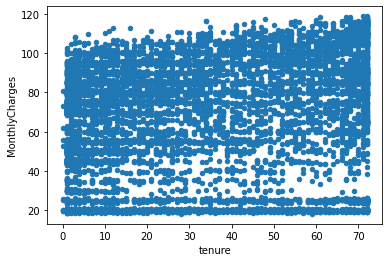

In [37]:
r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)
telco.plot.scatter(x='tenure', y='MonthlyCharges')
print('p=', p)
print('r=', r)

In [38]:
#Does tenure correlate with monthly charges?  NO

In [39]:
telco.loc[935:937]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
935,6630-UJZMY,Female,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.25,308.05,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
937,6400-BWQKW,Female,0,No,No,6,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.05,434.5,Yes


In [40]:
#TotalCharges is object. Need it as float

In [41]:
telco.shape

(7043, 21)

In [42]:
telco.TotalCharges.sort_values(ascending = True).head(20) 
#showed several rows with no total value. Dropped those rows.

936            
3826           
4380           
753            
5218           
3331           
6754           
6670           
1340           
488            
1082           
105       100.2
4459     100.25
1723     100.35
2124      100.4
2208      100.8
460       100.9
3883     1001.2
2799     1001.5
5337    1003.05
Name: TotalCharges, dtype: object

In [43]:
telco.drop(labels = [936, 488, 5218, 4380, 753, 6670, 1340, 3826, 6754, 3331, 1082], axis = 0, inplace = True)

In [44]:
telco.shape

(7032, 21)

In [45]:
#now that there are no blanks, can convert column to float
#if blanks in column, it returns error:
# cannot convert to float: ''

In [46]:
telco.TotalCharges = telco.TotalCharges.astype(float)

p= 0.0
r= 0.8258804609332093


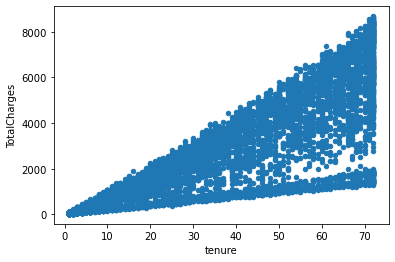

In [47]:
r, p = stats.pearsonr(telco.tenure, telco.TotalCharges)
telco.plot.scatter(x='tenure', y='TotalCharges')
print('p=', p)
print('r=', r)

In [48]:
#Total charges? Yes

In [49]:
#What happens if you control for phone and internet service?

In [50]:
telco.groupby('InternetService').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
InternetService,,,,
DSL,0.107202,32.889487,58.088017,2119.789259
Fiber optic,0.268411,32.917959,91.500129,3205.304570
No,0.034211,30.667763,21.076283,665.220329


In [51]:
telco.groupby('PhoneService').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PhoneService,,,,
No,0.152941,31.830882,41.992500,1500.433750
Yes,0.163413,32.485044,67.239625,2367.108588


In [52]:
control = telco[(telco.InternetService != 'No') & (telco.PhoneService == 'Yes')]
control

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


p= 0.0
r= 0.9579229778029181


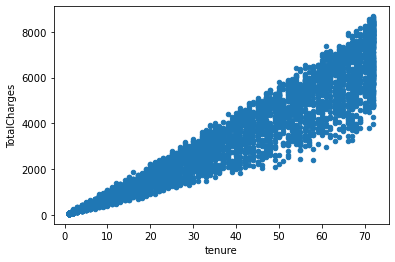

In [53]:
r, p = stats.pearsonr(control.tenure, control.TotalCharges)
control.plot.scatter(x='tenure', y='TotalCharges')
print('p=', p)
print('r=', r)

In [54]:
#What happens if you control for phone and internet service? Yes

p= 1.998548108068337e-231
r= 0.4429835314205348


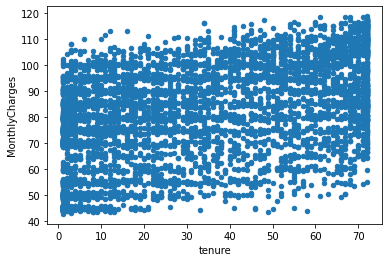

In [55]:
r, p = stats.pearsonr(control.tenure, control.MonthlyCharges)
control.plot.scatter(x='tenure', y='MonthlyCharges')
print('p=', p)
print('r=', r)

In [56]:
#What happens if you control for phone and internet service? Still NO

# 2

Use the employees database.

    Is there a relationship between how long an employee has been with the company and their salary?
    Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [57]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [58]:
query = '''
SELECT
    *
FROM salaries s
WHERE s.to_date > NOW()
'''

In [59]:
sal = pd.read_sql(query, url)

In [60]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     240124 non-null  int64 
 1   salary     240124 non-null  int64 
 2   from_date  240124 non-null  object
 3   to_date    240124 non-null  object
dtypes: int64(2), object(2)
memory usage: 7.3+ MB


In [61]:
sal.to_date = sal.to_date.astype('str')

In [62]:
sal.to_date = sal.to_date.replace(to_replace = '9999-01-01', value = pd.to_datetime('today').date())


In [63]:
sal.sample(5)

,emp_no,salary,from_date,to_date
59122,83739,70176,2002-07-13,2022-06-28
36043,54909,54513,2002-01-08,2022-06-28
79634,109305,73807,2002-01-21,2022-06-28
43206,63822,55680,2001-11-30,2022-06-28
173886,417137,82089,2001-11-26,2022-06-28


In [64]:
sal['time_at_comp'] = sal.to_date - sal.from_date

In [65]:
sal.head(3)

,emp_no,salary,from_date,to_date,time_at_comp
0,10001,88958,2002-06-22,2022-06-28,7311 days
1,10002,72527,2001-08-02,2022-06-28,7635 days
2,10003,43311,2001-12-01,2022-06-28,7514 days


In [66]:
sal.time_at_comp = sal.time_at_comp/np.timedelta64(1, 'D')

In [67]:
sal.head(3)

,emp_no,salary,from_date,to_date,time_at_comp
0,10001,88958,2002-06-22,2022-06-28,7311.0
1,10002,72527,2001-08-02,2022-06-28,7635.0
2,10003,43311,2001-12-01,2022-06-28,7514.0


p= 5.774946603439086e-136
r= -0.05061363684122252


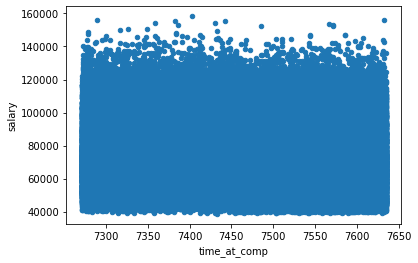

In [68]:
r, p = stats.pearsonr(sal.time_at_comp, sal.salary)
sal.plot.scatter(x='time_at_comp', y='salary')
print('p=', p)
print('r=', r)

In [69]:
#Is there a relationship between how long an employee has been with the company and their salary? no

In [70]:
#Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [71]:
query = '''
SELECT
    *
FROM titles t
'''

In [72]:
titles = pd.read_sql(query, url)

In [73]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [74]:
titles.to_date = titles.to_date.astype('str')

In [75]:
titles.to_date = titles.to_date.replace(to_replace = '9999-01-01', value = pd.to_datetime('today').date())

In [76]:
titles.sample(9);

In [77]:
l = titles.groupby('emp_no').count()

In [78]:
l = l.drop(columns = 'from_date')

In [79]:
l = l.drop(columns = 'to_date')

In [80]:
l.shape

(300024, 1)

In [81]:
titles.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [82]:
titles.from_date = titles.from_date.astype('str')

In [83]:
titles.to_date = titles.to_date.astype('str')

In [84]:
titles.to_date  = pd.to_datetime(titles.to_date)

In [85]:
titles.from_date = pd.to_datetime(titles.from_date)

In [86]:
titles.to_date - titles.from_date

0        13151 days
1         9460 days
2         9704 days
3         3287 days
4         9706 days
            ...    
443303    1826 days
443304   10895 days
443305    8584 days
443306    1826 days
443307    8976 days
Length: 443308, dtype: timedelta64[ns]

In [87]:
titles['length'] = (titles.to_date - titles.from_date)/np.timedelta64(1, 'D')

In [88]:
titles.head()

,emp_no,title,from_date,to_date,length
0,10001,Senior Engineer,1986-06-26,2022-06-28,13151.0
1,10002,Staff,1996-08-03,2022-06-28,9460.0
2,10003,Senior Engineer,1995-12-03,2022-06-28,9704.0
3,10004,Engineer,1986-12-01,1995-12-01,3287.0
4,10004,Senior Engineer,1995-12-01,2022-06-28,9706.0


In [89]:
lm = titles

In [90]:
lm.drop(columns = ['from_date', 'to_date', 'title'])

,emp_no,length
0,10001,13151.0
1,10002,9460.0
2,10003,9704.0
3,10004,3287.0
4,10004,9706.0
...,...,...
443303,499997,1826.0
443304,499997,10895.0
443305,499998,8584.0
443306,499998,1826.0


In [91]:
lm = lm.groupby('emp_no').sum()

In [92]:
lm.shape

(300024, 1)

In [93]:
k = l.join(lm, on = 'emp_no', how = 'left')

In [94]:
k.head()

,title,length
emp_no,,
10001,1,13151.0
10002,1,9460.0
10003,1,9704.0
10004,2,12993.0
10005,2,11977.0


KeyError: 'emp_no'

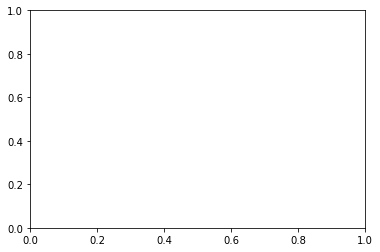

In [95]:
r, p = stats.pearsonr(k.length, k.title)
k.plot.scatter(x='length', y='emp_no')
print('p=', p)
print('r=', r)

In [ ]:
k.groupby('title').mean()

# 3

In [ ]:
# Use the sleepstudy data. Is there a relationship between days and reaction time? 
#Yes, there is a positive correlation

In [ ]:
sleep = data('sleepstudy')

In [ ]:
data

In [ ]:
data(show_doc = True)

In [ ]:
sleep

In [ ]:
sleep.info()

In [ ]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
sleep.plot.scatter(x='Days', y='Reaction')
print('p=', p)
print('r=', r)

In [ ]:
# Yes, there is a positive correlation